In [20]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [51]:
# directory for the small subset of audio files

small_audio = 'fma_small/fma_small'

In [64]:
def get_trackID_from_dir(audio_dir):
    track_ids = []
    for _, dir_name, files in os.walk(audio_dir):
        if dir_name == []:
            track_ids.extend(int(file[:-4]) for file in files)
    return track_ids

# get_trackID_from_dir(small_audio)

In [57]:
# ex: fma_small/fma_small/000002.mp3

def get_audio_path(audio_dir, tid):
    track_id_name = '{:6d}'.format(tid)
    return os.path.join(audio_dir, track_id_name[:3], track_id_name + '.mp3')

In [65]:
# check/confirm that there are 8000 tracks in the small subset

track_ids = get_trackID_from_dir(small_audio)
print(len(track_ids))

8000


In [53]:
def create_melSpect(tid):
    filename = get_audio_path(small_audio, tid)
    y, sr = librosa.load(filename)
    spect = librosa.feature.melspectrogram(y = y, sr = sr, n_fft = 2048, hop_length = 1024)
    spect = librosa.power_to_db(spect, ref = np.max)
    return spect.T

In [66]:
def plot_melSpect(tid):
    spect = create_melSpect(tid)
    print(spect.shape)
    plt.figure(figsize = (10, 4))
    librosa.display.specshow(spect.T, y_axis = 'mel', fmax = 8000, x_axis = 'time')
    plt.colorbar(format = '%+2.0f dB')
    plt.show()

In [67]:
plot_melSpect(2)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\swluk\\Documents\\CCNY\\Spring2020\\CSCI1910_NNTensorFlow\\Project\\fma_small\\fma_small\\   \\     2.mp3'

660984 22050
(128, 1291) fma_small\100\100549


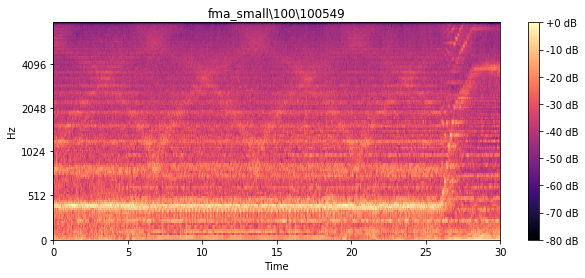

In [49]:
fn = get_audio_path(small_audio, 100549)
y, sr = librosa.load(fn)
print(len(y), sr)
single_file = fn.split('/')[-1]
genre_name = single_file.split('.')[0]
spect = librosa.feature.melspectrogram(y = y, sr=sr,n_fft = 2048, hop_length = 512)
spect = librosa.power_to_db(spect, ref = np.max)
# spect = np.log(spect)
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis = 'mel', fmax = 8000, x_axis = 'time')
plt.colorbar(format = '%+2.0f dB')
plt.title(str(genre_name))
plt.show()